# Algorithms and Integration
 
Anthony Dawson 2020.ipynb

30/11/20

---

This programme will numerically integrate the following 

$$ f(x) = {x}^3 - {3x}^2 -2x +190$$

With the solution of:

$$\int_{-2}^2 f(x) \,dx= 744$$

Using a number of different methods

The programme will then simulate a game of craps using similar methods to part 4 

----

1. Define rectangle rule function
2. Complete integrations and output area
3. Set the no. of iterations for each integration
4. Perform and time each integration
5. Define the accuracy function
6. Define the accuracy plot function
7. Start timer and use scipy to calculate integral
8. Define the Monte Carlo function
9. Use plot accuracy function to plot accuracy
10. Define probabilities for 2 die
11. Model Game 1
12. Print winrate and loss rate for 1000 games

Task 1: Rectangle Rule

In [4]:
#Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

#Define number of iterations
N = 10000

# Define f(x)
def function(x):
    return((x**3) - (3*(x**2)) - (2*x) + 190)

# Define rectangle rule function
def Rectangle_rule(a, b, f, N):
    h = (b-a)/N
    x=np.linspace(a, b, N)
    area=0
    for i in range(len(x)):
        #Compute the area of each rectangle in range
        area+= (f(x[i])*h)
    return(area)


#Complete integrations and output area
Rectangle_rule(-2, +2, function, N)    
    

743.9967996799702

Task 2: Accuracy and Performance of Rectangle Rule

In [5]:
import time
from time import perf_counter 

# Set the no. of iterations for each integration
N_1 = 10
N_2 = 100
N_3 = 1000
N_4 = 10000
N_5 = 100000

#Perform and time each integration
start = perf_counter()
Rectangle_rule(-2, +2, function, N_1)
end = perf_counter()
print(end - start)

start = perf_counter()
Rectangle_rule(-2, +2, function, N_2)
end = perf_counter()
print(end - start)

start = perf_counter()
Rectangle_rule(-2, +2, function, N_3)
end = perf_counter()
print(end - start)

start = perf_counter()
Rectangle_rule(-2, +2, function, N_4)
end = perf_counter()
print(end - start)

start = perf_counter()
Rectangle_rule(-2, +2, function, N_5)
end = perf_counter()
print(end - start)

0.000298999999984062
0.0006207000000131302
0.0040978000000109205
0.04015820000000758
0.3984961999999541


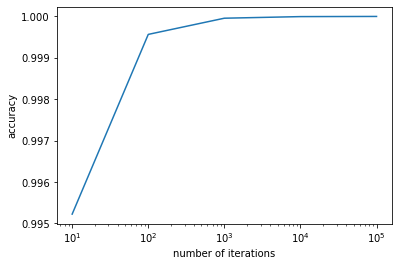

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the accuracy function
def accuracy(f,I,a, b, n):
    result= []
    for x in n:
        result.append(I(f, a, b, x))
    acc = 1-(abs(np.array(result) - 744)/744)
    return acc

# Define the accuracy plot function
def plot_accuracy(I):
    num_of_steps = np.array([pow(10,x) for x in range(1,6)])  # Iterations for 10^n
    plt.plot(num_of_steps, accuracy(f,I, -2, 2, num_of_steps))
    plt.xlabel("number of iterations")
    plt.xscale('log')
    plt.ylabel("accuracy")
    plt.show()

plot_accuracy(Rectangle_Rule)

Task 3: Scipy package

In [9]:
import scipy.integrate as integrate

# Start timer and use scipy to calculate integral
start = perf_counter()
integrate.quad(function, -2, 2)
end = perf_counter()
print(end - start)

0.00017990000003464957


Task 4: Monte Carlo and Visualisation

In [14]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

a = -2
b = 2
N = 1000
xrand = np.zeros(N)

for i in range(len(xrand)):
    xrand[i] = random.uniform(a,b)
    
integral = 0.0

for i in range(N):
    integral += function(xrand[i])
    
result = (b-a)/float(N)*integral
print("The integral from -2 to 2 of the function: ", result)


The integral from -2 to 2 of the function:  744.1160917770725


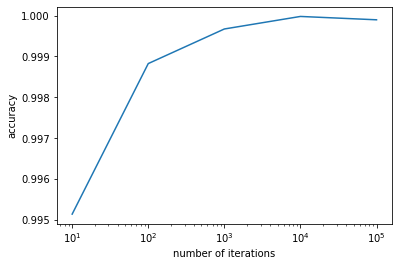

In [17]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

# Define the Monte Carlo function
def monty(function,a,b,n):
    sumval = 0.0
    the_range = np.random.uniform(a,b,n)
    for i in the_range:
        i = float(i)
        sumval = sumval + function(i)
    sumval = (b-a)/n * sumval
    return sumval

plot_accuracy(monty)

In [6]:
from scipy import random

N_C = 1000


# Define probabilities for 2 die
def Dice_2():
    dice1 = random.randint(1, 6)
    dice2 = random.randint(1, 6)
    roll = dice1 + dice2
    return roll

# Model Game 1
def Game_1():
    initial_roll = Dice_2()
    if initial_roll == 7 or initial_roll == 11:
        return True     # win
    elif initial_roll == 2 or initial_roll == 3 or initial_roll == 12:
        return False    #lose
    else:
        roll = Dice_2()
        while roll != 7 and roll != initial_roll:
            roll = Dice_2()
        if roll == 7:
            return False   
        else:
            return True    

# Simulate N number of games of craps
def sim_N_C(N_C):
    wins = 0
    for i in range(N_C):
        if Game_1():
            wins += 1
    return wins

# Print winrate and loss rate for 1000 games
def print_prob(wins, total):
    winrate = wins / total
    lossrate = (1 - winrate)
    print("{2:0.2%} wins".format(wins, total, winrate))
    print("{2:0.2%} losses".format(wins, total, lossrate))

wins = sim_N_C(N_C)
print_prob(wins, N_C)

47.10% wins
52.90% losses
